## HSBC

In [1]:
# DataFrame
import numpy as np
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Collections
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
hsbc_sent_df = pd.read_csv('../AvgDailySent/hsbc_daily_avg_sent.csv')
hsbc_sent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  484 non-null    object 
 1   sentiment   448 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


In [3]:
hsbc_sent_df.head()

,created_at,sentiment
0,2021-01-01 00:00:00+00:00,1.0
1,2021-01-02 00:00:00+00:00,NaN
2,2021-01-03 00:00:00+00:00,1.0
3,2021-01-04 00:00:00+00:00,1.0
4,2021-01-05 00:00:00+00:00,1.0


In [4]:
# Convert date column to datetime.
hsbc_sent_df['created_at'] = pd.to_datetime(hsbc_sent_df['created_at']).dt.tz_localize(None)
hsbc_sent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  484 non-null    datetime64[ns]
 1   sentiment   448 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.7 KB


In [5]:
# Assign target value.
hsbc_sent_df.loc[hsbc_sent_df['sentiment'] < 1.0, 'sentiment'] = 0.0
hsbc_sent_df.loc[hsbc_sent_df['sentiment'] > 1.0, 'sentiment'] = 2.0
hsbc_sent_df

,created_at,sentiment
0,2021-01-01,1.0
1,2021-01-02,NaN
2,2021-01-03,1.0
3,2021-01-04,1.0
4,2021-01-05,1.0
...,...,...
479,2022-04-25,0.0
480,2022-04-26,0.0
481,2022-04-27,1.0
482,2022-04-28,1.0


Text(0.5, 1.0, 'hsbc daily sentiment labels distribuition')

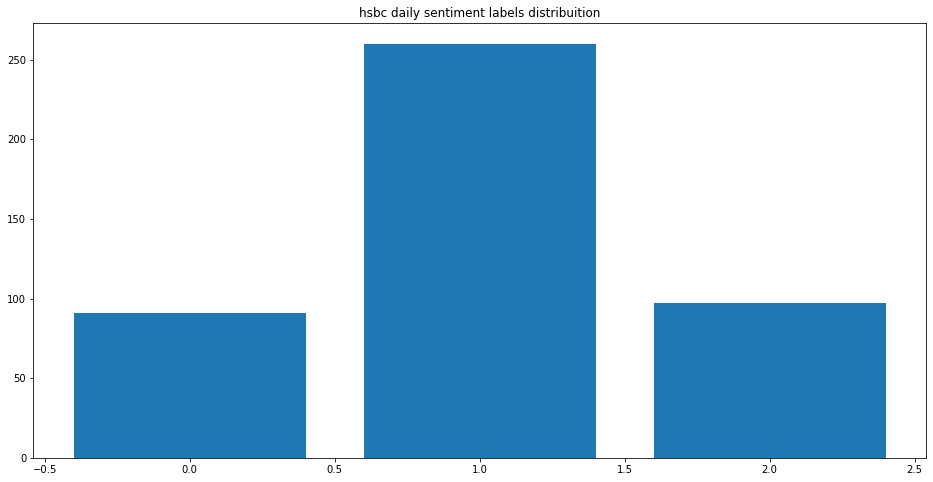

In [7]:
target_count = Counter(hsbc_sent_df.sentiment)

plt.figure(figsize=(16,8))
plt.bar(target_count.keys(), target_count.values())
plt.title("hsbc daily sentiment labels distribuition")

In [8]:
hsbc_sent_df['sentiment'].value_counts()    

1.0    260
2.0     97
0.0     91
Name: sentiment, dtype: int64

### Load stock data

In [6]:
hsbc_stock_df = pd.read_csv('../StockData/HSBA.L.csv')
hsbc_stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,382.500000,386.549988,377.149994,380.350006,350.225769,29343345
1,2021-01-05,380.649994,384.450012,376.299988,378.600006,348.614349,18431746
2,2021-01-06,389.000000,418.500000,389.000000,416.149994,383.190369,53328129
3,2021-01-07,414.750000,418.200012,407.149994,417.049988,384.019073,36442644
4,2021-01-08,413.950012,416.600006,408.500000,411.750000,379.138824,22570269


In [12]:
hsbc_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       335 non-null    object 
 1   Open       335 non-null    float64
 2   High       335 non-null    float64
 3   Low        335 non-null    float64
 4   Close      335 non-null    float64
 5   Adj Close  335 non-null    float64
 6   Volume     335 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 18.4+ KB


In [7]:
hsbc_stock_df = hsbc_stock_df.rename({'Date': 'created_at'}, axis=1)
hsbc_stock_df.head()

,created_at,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,382.500000,386.549988,377.149994,380.350006,350.225769,29343345
1,2021-01-05,380.649994,384.450012,376.299988,378.600006,348.614349,18431746
2,2021-01-06,389.000000,418.500000,389.000000,416.149994,383.190369,53328129
3,2021-01-07,414.750000,418.200012,407.149994,417.049988,384.019073,36442644
4,2021-01-08,413.950012,416.600006,408.500000,411.750000,379.138824,22570269


In [8]:
# Finetune the date such that sentiment for the previous day is assigned to the stock price of the current day.
hsbc_sent_df['created_at'] = hsbc_sent_df['created_at'] + pd.Timedelta(days=1)
hsbc_sent_df.head()

,created_at,sentiment
0,2021-01-02,1.0
1,2021-01-03,NaN
2,2021-01-04,1.0
3,2021-01-05,1.0
4,2021-01-06,1.0


In [9]:
# Convert date column to datetime.
hsbc_stock_df['created_at'] = pd.to_datetime(hsbc_stock_df['created_at']).dt.tz_localize(None)

In [10]:
merged = pd.merge(hsbc_stock_df, hsbc_sent_df, on='created_at')
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2021-01-04,382.500000,386.549988,377.149994,380.350006,350.225769,29343345,1.0
1,2021-01-05,380.649994,384.450012,376.299988,378.600006,348.614349,18431746,1.0
2,2021-01-06,389.000000,418.500000,389.000000,416.149994,383.190369,53328129,1.0
3,2021-01-07,414.750000,418.200012,407.149994,417.049988,384.019073,36442644,2.0
4,2021-01-08,413.950012,416.600006,408.500000,411.750000,379.138824,22570269,1.0


In [17]:
merged['sentiment'].value_counts()

1.0    177
2.0     70
0.0     69
Name: sentiment, dtype: int64

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(merged[['sentiment']])
merged['sentiment'] = imputer.transform(merged[['sentiment']])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  335 non-null    datetime64[ns]
 1   Open        335 non-null    float64       
 2   High        335 non-null    float64       
 3   Low         335 non-null    float64       
 4   Close       335 non-null    float64       
 5   Adj Close   335 non-null    float64       
 6   Volume      335 non-null    int64         
 7   sentiment   335 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 23.6 KB


In [20]:
merged['sentiment'].value_counts()

1.0    196
2.0     70
0.0     69
Name: sentiment, dtype: int64

In [13]:
merged['trend'] = merged['Close'] - merged['Open']
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend
0,2021-01-04,382.500000,386.549988,377.149994,380.350006,350.225769,29343345,1.0,-2.149994
1,2021-01-05,380.649994,384.450012,376.299988,378.600006,348.614349,18431746,1.0,-2.049988
2,2021-01-06,389.000000,418.500000,389.000000,416.149994,383.190369,53328129,1.0,27.149994
3,2021-01-07,414.750000,418.200012,407.149994,417.049988,384.019073,36442644,2.0,2.299988
4,2021-01-08,413.950012,416.600006,408.500000,411.750000,379.138824,22570269,1.0,-2.200012


In [14]:
merged.loc[merged['trend'] < 0, 'Trend'] = 'Negative'
merged.loc[merged['trend'] > 0, 'Trend'] = 'Positive'
merged.loc[merged['trend'] == 0, 'Trend'] = 'Neutral'
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,Trend
0,2021-01-04,382.500000,386.549988,377.149994,380.350006,350.225769,29343345,1.0,-2.149994,Negative
1,2021-01-05,380.649994,384.450012,376.299988,378.600006,348.614349,18431746,1.0,-2.049988,Negative
2,2021-01-06,389.000000,418.500000,389.000000,416.149994,383.190369,53328129,1.0,27.149994,Positive
3,2021-01-07,414.750000,418.200012,407.149994,417.049988,384.019073,36442644,2.0,2.299988,Positive
4,2021-01-08,413.950012,416.600006,408.500000,411.750000,379.138824,22570269,1.0,-2.200012,Negative


In [15]:
merged['Trend'].value_counts()

Positive    197
Negative    138
Name: Trend, dtype: int64

In [16]:
merged.drop(['trend'], axis=1, inplace=True)
merged.rename({'Trend': 'trend'}, axis=1, inplace=True)
merged.head()

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend
0,2021-01-04,382.500000,386.549988,377.149994,380.350006,350.225769,29343345,1.0,Negative
1,2021-01-05,380.649994,384.450012,376.299988,378.600006,348.614349,18431746,1.0,Negative
2,2021-01-06,389.000000,418.500000,389.000000,416.149994,383.190369,53328129,1.0,Positive
3,2021-01-07,414.750000,418.200012,407.149994,417.049988,384.019073,36442644,2.0,Positive
4,2021-01-08,413.950012,416.600006,408.500000,411.750000,379.138824,22570269,1.0,Negative


In [17]:
future_trend = merged['Close'].diff(periods=5)
merged['future_trend'] = future_trend
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend
0,2021-01-04,382.500000,386.549988,377.149994,380.350006,350.225769,29343345,1.0,Negative,NaN
1,2021-01-05,380.649994,384.450012,376.299988,378.600006,348.614349,18431746,1.0,Negative,NaN
2,2021-01-06,389.000000,418.500000,389.000000,416.149994,383.190369,53328129,1.0,Positive,NaN
3,2021-01-07,414.750000,418.200012,407.149994,417.049988,384.019073,36442644,2.0,Positive,NaN
4,2021-01-08,413.950012,416.600006,408.500000,411.750000,379.138824,22570269,1.0,Negative,NaN
5,2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,2.0,Negative,27.850006
6,2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,2.0,Positive,34.199982
7,2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,2.0,Negative,-13.000000
8,2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,1.0,Positive,-8.849976
9,2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,1.0,Negative,-8.500000


In [18]:
merged.loc[merged['future_trend'] < 0, 'Trend'] = 'Negative'
merged.loc[merged['future_trend'] > 0, 'Trend'] = 'Positive'
merged.loc[merged['future_trend'] == 0, 'Trend'] = 'Neutral'
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,Trend
0,2021-01-04,382.500000,386.549988,377.149994,380.350006,350.225769,29343345,1.0,Negative,NaN,NaN
1,2021-01-05,380.649994,384.450012,376.299988,378.600006,348.614349,18431746,1.0,Negative,NaN,NaN
2,2021-01-06,389.000000,418.500000,389.000000,416.149994,383.190369,53328129,1.0,Positive,NaN,NaN
3,2021-01-07,414.750000,418.200012,407.149994,417.049988,384.019073,36442644,2.0,Positive,NaN,NaN
4,2021-01-08,413.950012,416.600006,408.500000,411.750000,379.138824,22570269,1.0,Negative,NaN,NaN
5,2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,2.0,Negative,27.850006,Positive
6,2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,2.0,Positive,34.199982,Positive
7,2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,2.0,Negative,-13.000000,Negative
8,2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,1.0,Positive,-8.849976,Negative
9,2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,1.0,Negative,-8.500000,Negative


In [19]:
merged.drop(['future_trend'], axis=1, inplace=True)
merged.rename({'Trend': 'future_trend'}, axis=1, inplace=True)

In [28]:
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend
0,2021-01-04,382.500000,386.549988,377.149994,380.350006,350.225769,29343345,1.0,Negative,NaN
1,2021-01-05,380.649994,384.450012,376.299988,378.600006,348.614349,18431746,1.0,Negative,NaN
2,2021-01-06,389.000000,418.500000,389.000000,416.149994,383.190369,53328129,1.0,Positive,NaN
3,2021-01-07,414.750000,418.200012,407.149994,417.049988,384.019073,36442644,2.0,Positive,NaN
4,2021-01-08,413.950012,416.600006,408.500000,411.750000,379.138824,22570269,1.0,Negative,NaN
5,2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,2.0,Negative,Positive
6,2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,2.0,Positive,Positive
7,2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,2.0,Negative,Negative
8,2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,1.0,Positive,Negative
9,2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,1.0,Negative,Negative


### Moving Averages

In [20]:
sma_5 = merged['Close'].rolling(5).mean().shift()
ema_5 = merged['Close'].ewm(5).mean().shift()

In [21]:
merged['sma_5'] = sma_5
merged['ema_5'] = ema_5
merged.head(10)

,created_at,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5
0,2021-01-04,382.500000,386.549988,377.149994,380.350006,350.225769,29343345,1.0,Negative,NaN,NaN,NaN
1,2021-01-05,380.649994,384.450012,376.299988,378.600006,348.614349,18431746,1.0,Negative,NaN,NaN,380.350006
2,2021-01-06,389.000000,418.500000,389.000000,416.149994,383.190369,53328129,1.0,Positive,NaN,NaN,379.395461
3,2021-01-07,414.750000,418.200012,407.149994,417.049988,384.019073,36442644,2.0,Positive,NaN,NaN,393.935716
4,2021-01-08,413.950012,416.600006,408.500000,411.750000,379.138824,22570269,1.0,Negative,NaN,NaN,401.376376
5,2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,2.0,Negative,Positive,400.779999,404.266983
6,2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,2.0,Positive,Positive,406.350000,405.252554
7,2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,2.0,Negative,Negative,413.189996,406.997419
8,2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,1.0,Positive,Negative,410.589996,406.161857
9,2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,1.0,Negative,Negative,408.820001,406.583210


In [22]:
merged.dropna(inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 5 to 334
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_at    330 non-null    datetime64[ns]
 1   Open          330 non-null    float64       
 2   High          330 non-null    float64       
 3   Low           330 non-null    float64       
 4   Close         330 non-null    float64       
 5   Adj Close     330 non-null    float64       
 6   Volume        330 non-null    int64         
 7   sentiment     330 non-null    float64       
 8   trend         330 non-null    object        
 9   future_trend  330 non-null    object        
 10  sma_5         330 non-null    float64       
 11  ema_5         330 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 33.5+ KB


In [23]:
merged.set_index('created_at', inplace=True)
merged.head(10)

,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5
created_at,,,,,,,,,,,
2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,2.0,Negative,Positive,400.779999,404.266983
2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,2.0,Positive,Positive,406.350000,405.252554
2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,2.0,Negative,Negative,413.189996,406.997419
2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,1.0,Positive,Negative,410.589996,406.161857
2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,1.0,Negative,Negative,408.820001,406.583210
2021-01-18,401.149994,404.649994,399.750000,403.000000,371.081848,8564292,2.0,Positive,Negative,407.120001,405.920672
2021-01-19,414.200012,418.649994,408.149994,411.450012,378.862579,31443356,1.0,Negative,Negative,406.079999,405.358190
2021-01-20,411.200012,412.149994,404.250000,408.000000,375.685852,24043501,1.0,Negative,Positive,405.810004,406.501751
2021-01-21,417.200012,421.100006,412.250000,413.600006,380.842316,24604870,1.0,Negative,Positive,406.780005,406.777204


Text(0.5, 1.0, 'HSBC Closing Stock Price and Moving Averages')

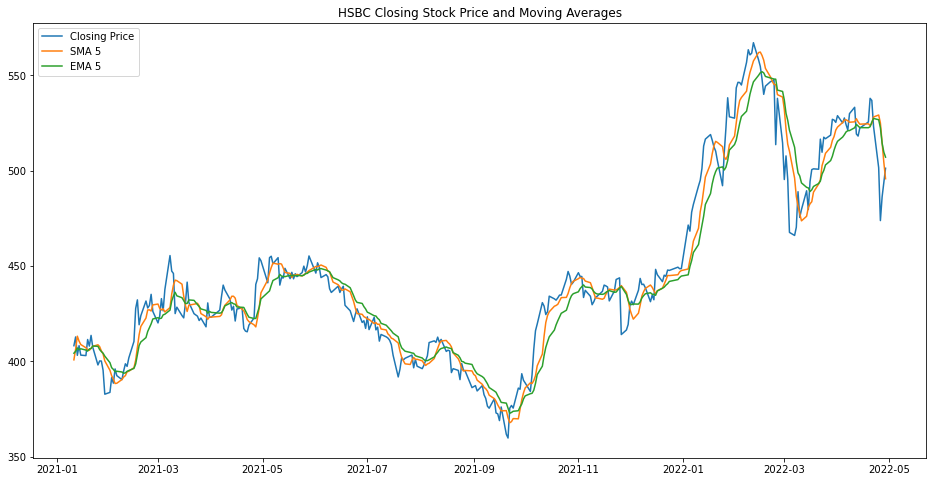

In [33]:
# Plot close price and moving averages.
plt.figure(figsize=(16,8))
plt.plot(merged['Close'], label='Closing Price')
plt.plot(merged['sma_5'], label='SMA 5')
plt.plot(merged['ema_5'], label='EMA 5')
plt.legend(loc='upper left')
plt.title('HSBC Closing Stock Price and Moving Averages')

In [34]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2021-01-11 to 2022-04-29
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          330 non-null    float64
 1   High          330 non-null    float64
 2   Low           330 non-null    float64
 3   Close         330 non-null    float64
 4   Adj Close     330 non-null    float64
 5   Volume        330 non-null    int64  
 6   sentiment     330 non-null    float64
 7   trend         330 non-null    object 
 8   future_trend  330 non-null    object 
 9   sma_5         330 non-null    float64
 10  ema_5         330 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 30.9+ KB


### Train - Test Split

In [24]:
test_size = 110
df_train = merged[:-test_size]
df_test = merged[-test_size:]
print('There are {} training samples and {} test samples.'.format(len(df_train), len(df_test)))

There are 220 training samples and 110 test samples.


In [25]:
def get_dummies(train_set, test_set, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
    
    one_hot_encoder = OneHotEncoder(drop="if_binary", sparse=False)
    
    cat_vals = train_set[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    # Trainset 
    for i, new_col_name in enumerate(new_col_names):
        train_set[new_col_name] = transformed[:,i]
    
    cat_vals = test_set[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)
    # Testset
    for i, new_col_name in enumerate(new_col_names):
        test_set[new_col_name] = transformed[:,i]
    
    return train_set, test_set

df_train, df_test = get_dummies(df_train, df_test, 'trend')

# check if the dummies are produced correctly in the trainset
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5,Positive
created_at,,,,,,,,,,,,
2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,2.0,Negative,Positive,400.779999,404.266983,0.0
2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,2.0,Positive,Positive,406.350000,405.252554,1.0
2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,2.0,Negative,Negative,413.189996,406.997419,0.0
2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,1.0,Positive,Negative,410.589996,406.161857,1.0
2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,1.0,Negative,Negative,408.820001,406.583210,0.0


In [26]:
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,trend,future_trend,sma_5,ema_5,Positive
created_at,,,,,,,,,,,,
2021-11-22,434.250000,437.950012,431.399994,436.950012,417.591614,18174274,1.0,Positive,Positive,437.400006,436.215997,1.0
2021-11-23,434.000000,446.850006,433.799988,442.950012,423.325806,18623327,1.0,Positive,Positive,437.450006,436.338332,1.0
2021-11-24,442.850006,447.350006,442.149994,443.350006,423.708099,33193526,2.0,Positive,Positive,438.040008,437.440279,1.0
2021-11-25,444.500000,445.750000,439.850006,443.799988,424.138123,14178917,1.0,Negative,Positive,438.790008,438.425234,0.0
2021-11-26,427.250000,429.200012,413.399994,414.049988,395.706177,43810097,1.0,Negative,Negative,439.750006,439.321026,0.0


In [27]:
df_train.drop(['trend'], axis=1, inplace=True)
df_test.drop(['trend'], axis=1, inplace=True)

In [ ]:
# df_train.rename({'Positive': 'encoded_trend'}, axis=1, inplace=True)
# df_test.rename({'Positive': 'encoded_trend'}, axis=1, inplace=True)

### Training set scaling

In [30]:
scaler = StandardScaler()

trainset_target = df_train["future_trend"].values
trainset_predictors = df_train.drop("future_trend", axis=1)
scaled_vals = scaler.fit_transform(trainset_predictors)
df_train = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# Put non-scaled target variable back into the dataframe
df_train['future_trend'] = trainset_target

# inspect the data
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,sma_5,ema_5,Positive,future_trend
0,-0.303165,-0.353871,-0.387562,-0.457590,-0.867542,-0.679846,1.449886,-0.799940,-0.660635,-1.213223,Positive
1,-0.346810,-0.331272,-0.147798,-0.249455,-0.668919,-0.841231,1.449886,-0.539920,-0.611258,0.824251,Positive
2,-0.610977,-0.699632,-0.521743,-0.686088,-1.085594,-0.431429,1.449886,-0.220614,-0.523841,-1.213223,Negative
3,-0.599492,-0.534660,-0.411759,-0.457590,-0.867542,0.701910,-0.076310,-0.341988,-0.565703,0.824251,Negative
4,-0.530578,-0.552740,-0.589933,-0.681563,-1.081275,-0.377710,-0.076310,-0.424615,-0.544593,-1.213223,Negative


### Testing set scaling

In [31]:
testset_target = df_test["future_trend"].values
testset_predictors = df_test.drop("future_trend", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.transform(testset_predictors)
df_test = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# Put non-scaled target variable back into the dataframe
df_test['future_trend'] = testset_target

# inspect the data
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,sma_5,ema_5,Positive,future_trend
0,0.764987,0.719567,0.791463,0.843260,1.088899,-0.524708,-0.076310,0.909563,0.939998,0.824251,Positive
1,0.753501,1.121824,0.897047,1.114741,1.357791,-0.481419,-0.076310,0.911897,0.946127,0.824251,Positive
2,1.160088,1.144423,1.264394,1.132840,1.375718,0.923155,1.449886,0.939440,1.001334,0.824251,Positive
3,1.235892,1.072106,1.163209,1.153200,1.395883,-0.909863,-0.076310,0.974451,1.050680,-1.213223,Positive
4,0.443393,0.324090,-0.000420,-0.192896,0.062631,1.946598,-0.076310,1.019266,1.095559,-1.213223,Negative


In [32]:
X_train = df_train.drop('future_trend', axis=1)
y_train = df_train['future_trend'].copy()

### Baseline

In [33]:
y_train.value_counts()

Negative    117
Positive    103
Name: future_trend, dtype: int64

The baseline classifier will output "Negative" for all predictions. We will use macro-averaging in this project (precision, recall and F-score are evaluated in each class separately and then averaged across classes).

So if we apply the baseline classifier to all of the training set. 

For the "Negative" label, the accuracy measures will be:

* Precision: 117/220 = 0.532

* Recall: 117/117 = 1.0

* F-score: 2/(1/precision + 1/recall) = 0.694

For the "Positive" label, it will be:

* Precision: 0.0/0.0 = 0.0

* Recall: 0.0/103 = 0.0

* F-score: 0.0

The averages of the two classes, i.e. the eventual baseline scores:

* **Precision: 0.266**

* **Recall: 0.5**

* **F-score: 0.347**

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
import time

rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time() - start
print(f"Took {end} seconds")

Took 124.13802719116211 seconds


In [35]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=200,
                       random_state=7)

In [36]:
grid_search.best_score_

0.6772727272727274

In [37]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
10,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}",0.964646,0.677273,29.790576
19,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 1000}",0.994444,0.677273,31.894363
9,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}",0.961616,0.672727,30.042017
17,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}",0.991414,0.668182,32.603158
11,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 1000}",0.962626,0.668182,30.587618
18,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}",0.991919,0.668182,32.637475
23,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 1000}",0.969192,0.659091,31.995831
14,"{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}",0.946465,0.654545,30.843116
16,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 10}",0.979293,0.654545,33.161423
15,"{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 1000}",0.945455,0.650000,31.250000


In [38]:
feature_importances = grid_search.best_estimator_.feature_importances_

for k, v in sorted(zip(feature_importances, X_train.columns), reverse=True):
    print(f"{v}: {k}")

ema_5: 0.1631045021655808
sma_5: 0.1413389319332508
Close: 0.1322071642503783
High: 0.13064547904399557
Adj Close: 0.10645020851971695
Volume: 0.10153338382035833
Low: 0.0780784379408125
Open: 0.07117638284126443
Positive: 0.0645909612967719
sentiment: 0.010874548187870299


In [39]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/hsbc-rf-clf.joblib')

['models/hsbc-rf-clf.joblib']

In [40]:
from sklearn.svm import SVC

svm = SVC(random_state=7, kernel='rbf')

# specify the hyperparameters and their values
# 5 x 3 = 15 combinations in the grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ["scale", "auto", 0.1],
}

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time() - start
print(f"Took {end} seconds")

Took 1.6503500938415527 seconds


In [41]:
grid_search.best_score_

0.7909090909090908

In [42]:
grid_search.best_estimator_

SVC(C=100, random_state=7)

In [43]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
12,"{'C': 100, 'gamma': 'scale'}",0.978788,0.790909,1.919505e+01
13,"{'C': 100, 'gamma': 'auto'}",0.979798,0.786364,1.974227e+01
14,"{'C': 100, 'gamma': 0.1}",0.979798,0.786364,1.974227e+01
9,"{'C': 10, 'gamma': 'scale'}",0.945960,0.768182,1.879338e+01
10,"{'C': 10, 'gamma': 'auto'}",0.944444,0.768182,1.866310e+01
11,"{'C': 10, 'gamma': 0.1}",0.944444,0.768182,1.866310e+01
6,"{'C': 1, 'gamma': 'scale'}",0.872727,0.713636,1.822917e+01
7,"{'C': 1, 'gamma': 'auto'}",0.872222,0.713636,1.818182e+01
8,"{'C': 1, 'gamma': 0.1}",0.872222,0.713636,1.818182e+01
4,"{'C': 0.1, 'gamma': 'auto'}",0.688889,0.604545,1.224340e+01


In [44]:
# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/hsbc-svm-rbf-clf.joblib')

['models/hsbc-svm-rbf-clf.joblib']

In [45]:
from joblib import load
best_svm = load("models/hsbc-svm-rbf-clf.joblib")
best_rf = load("models/hsbc-rf-clf.joblib")

In [46]:
X_test = df_test.drop("future_trend", axis=1)
y_test = df_test["future_trend"].copy()

In [47]:
ypred = best_svm.predict(X_test)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, ypred, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.7205720572057206
Recall: 0.5708731000353482
F score: 0.5341176470588235


In [48]:
accuracy_score(y_test, ypred)

0.6727272727272727

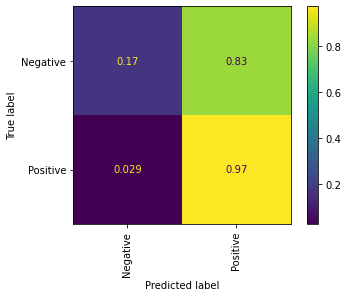

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, ypred, labels=best_svm.classes_, 
                                        xticks_rotation="vertical", normalize="true")

In [49]:
rf_ypred = best_rf.predict(X_test)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, rf_ypred, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Random Forest:
Precision: 0.5686274509803921
Recall: 0.5197949805585013
F score: 0.461749612125552


In [50]:
accuracy_score(y_test, rf_ypred)

0.6272727272727273

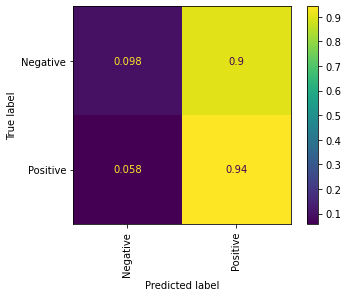

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, rf_ypred, labels=best_svm.classes_, 
                                        xticks_rotation="vertical", normalize="true")

### TSA

In [64]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [65]:
def stationary_plot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

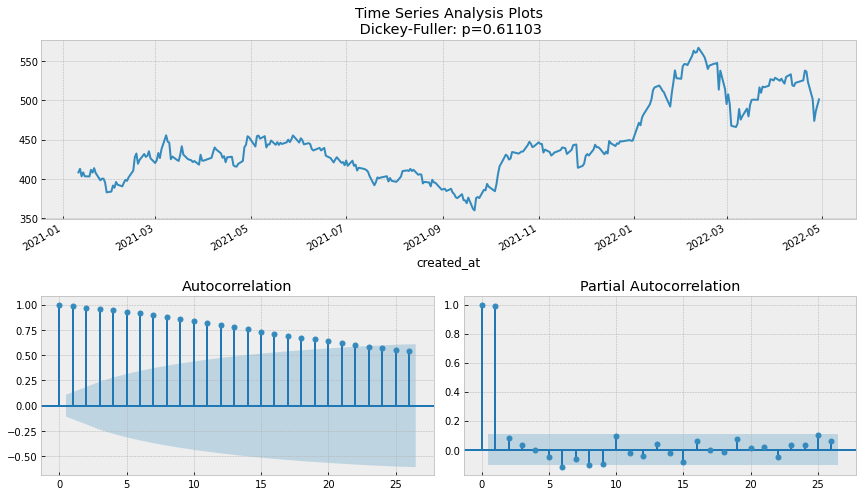

In [66]:
stationary_plot(merged["Close"])

### Testing without sentiment Variable.

In [51]:
stock_data_only = merged.drop(['sentiment'], axis=1)
stock_data_only.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5
created_at,,,,,,,,,,
2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,Negative,Positive,400.779999,404.266983
2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,Positive,Positive,406.350000,405.252554
2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,Negative,Negative,413.189996,406.997419
2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,Positive,Negative,410.589996,406.161857
2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,Negative,Negative,408.820001,406.583210


In [52]:
training_set = stock_data_only[:-test_size]
testing_set = stock_data_only[-test_size:]
print('There are {} training samples and {} test samples.'.format(len(df_train), len(df_test)))

There are 220 training samples and 110 test samples.


In [53]:
training_set.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5
created_at,,,,,,,,,,
2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,Negative,Positive,400.779999,404.266983
2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,Positive,Positive,406.350000,405.252554
2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,Negative,Negative,413.189996,406.997419
2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,Positive,Negative,410.589996,406.161857
2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,Negative,Negative,408.820001,406.583210


In [54]:
train_set, test_set = get_dummies(training_set, testing_set, 'trend')
train_set.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5,Positive
created_at,,,,,,,,,,,
2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,Negative,Positive,400.779999,404.266983,0.0
2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,Positive,Positive,406.350000,405.252554,1.0
2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,Negative,Negative,413.189996,406.997419,0.0
2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,Positive,Negative,410.589996,406.161857,1.0
2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,Negative,Negative,408.820001,406.583210,0.0


In [55]:
test_set.head()

,Open,High,Low,Close,Adj Close,Volume,trend,future_trend,sma_5,ema_5,Positive
created_at,,,,,,,,,,,
2021-11-22,434.250000,437.950012,431.399994,436.950012,417.591614,18174274,Positive,Positive,437.400006,436.215997,1.0
2021-11-23,434.000000,446.850006,433.799988,442.950012,423.325806,18623327,Positive,Positive,437.450006,436.338332,1.0
2021-11-24,442.850006,447.350006,442.149994,443.350006,423.708099,33193526,Positive,Positive,438.040008,437.440279,1.0
2021-11-25,444.500000,445.750000,439.850006,443.799988,424.138123,14178917,Negative,Positive,438.790008,438.425234,0.0
2021-11-26,427.250000,429.200012,413.399994,414.049988,395.706177,43810097,Negative,Negative,439.750006,439.321026,0.0


In [58]:
train_set.drop(['trend'], axis=1, inplace=True)
test_set.drop(['trend'], axis=1, inplace=True)

In [59]:
train_set.head()

,Open,High,Low,Close,Adj Close,Volume,future_trend,sma_5,ema_5,Positive
created_at,,,,,,,,,,
2021-01-11,411.000000,414.200012,404.600006,408.200012,375.869995,16564968,Positive,400.779999,404.266983,0.0
2021-01-12,410.049988,414.700012,410.049988,412.799988,380.105682,14890862,Positive,406.350000,405.252554,1.0
2021-01-13,404.299988,406.549988,401.549988,403.149994,371.219971,19141900,Negative,413.189996,406.997419,0.0
2021-01-14,404.549988,410.200012,404.049988,408.200012,375.869995,30898467,Negative,410.589996,406.161857,1.0
2021-01-15,406.049988,409.799988,400.000000,403.250000,371.312073,19699147,Negative,408.820001,406.583210,0.0


Feature Scaling

In [60]:
training_target = train_set["future_trend"].values
training_predictors = train_set.drop("future_trend", axis=1)
scaled_vals = scaler.fit_transform(training_predictors)
train_set = pd.DataFrame(scaled_vals, columns=training_predictors.columns)

# Put non-scaled target variable back into the dataframe
train_set['future_trend'] = trainset_target

# inspect the data
train_set.head()

,Open,High,Low,Close,Adj Close,Volume,sma_5,ema_5,Positive,future_trend
0,-0.303165,-0.353871,-0.387562,-0.457590,-0.867542,-0.679846,-0.799940,-0.660635,-1.213223,Positive
1,-0.346810,-0.331272,-0.147798,-0.249455,-0.668919,-0.841231,-0.539920,-0.611258,0.824251,Positive
2,-0.610977,-0.699632,-0.521743,-0.686088,-1.085594,-0.431429,-0.220614,-0.523841,-1.213223,Negative
3,-0.599492,-0.534660,-0.411759,-0.457590,-0.867542,0.701910,-0.341988,-0.565703,0.824251,Negative
4,-0.530578,-0.552740,-0.589933,-0.681563,-1.081275,-0.377710,-0.424615,-0.544593,-1.213223,Negative


In [61]:
testing_target = test_set["future_trend"].values
testing_predictors = test_set.drop("future_trend", axis=1)
scaled_vals = scaler.fit_transform(testing_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testing_predictors.columns)

# Put non-scaled target variable back into the dataframe
test_set['future_trend'] = testing_target

# inspect the data
test_set.head()

,Open,High,Low,Close,Adj Close,Volume,sma_5,ema_5,Positive,future_trend
0,-1.496888,-1.552130,-1.466720,-1.459249,-1.489258,-1.127507,-1.404676,-1.432144,0.847791,Positive
1,-1.503026,-1.335164,-1.407056,-1.312352,-1.350373,-1.091737,-1.403457,-1.429045,0.847791,Positive
2,-1.285723,-1.322975,-1.199476,-1.302559,-1.341114,0.068894,-1.389075,-1.401123,0.847791,Positive
3,-1.245210,-1.361980,-1.256654,-1.291542,-1.330699,-1.445769,-1.370793,-1.376166,-1.179536,Positive
4,-1.668765,-1.765440,-1.914197,-2.019909,-2.019335,0.914587,-1.347391,-1.353469,-1.179536,Negative


In [62]:
Xtrain = train_set.drop('future_trend', axis=1)
ytrain = train_set['future_trend'].copy()

#### Random Forest Classifier

In [63]:
rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 134.9348168373108 seconds


In [64]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=200,
                       random_state=7)

In [65]:
grid_search.best_score_

0.6954545454545455

In [66]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)
feature_importances = grid_search.best_estimator_.feature_importances_

In [67]:
for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

ema_5: 0.1987972985443568
sma_5: 0.139913813741692
Close: 0.13810698091823512
High: 0.12742486263738675
Adj Close: 0.09767009949765997
Volume: 0.0885571186760933
Low: 0.08603749741807318
Open: 0.07847197612070751
Positive: 0.0450203524457955


In [68]:
# Save Models
if not os.path.exists("test_models"):
    os.makedirs("test_models")
    
dump(grid_search.best_estimator_, 'test_models/hsbc-rftest-clf.joblib')

['test_models/hsbc-rftest-clf.joblib']

#### Support Vector Classifier.

In [69]:
svc = SVC(random_state=7, kernel='rbf')

# specify the hyperparameters and their values
# 5 x 3 = 15 combinations in the grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ["scale", "auto", 0.1],
}

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=10,
                           scoring='accuracy', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 13.162127256393433 seconds


In [70]:
grid_search.best_estimator_

SVC(C=100, random_state=7)

In [71]:
grid_search.best_score_

0.8318181818181818

In [72]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
12,"{'C': 100, 'gamma': 'scale'}",0.965152,0.831818,1.381476e+01
13,"{'C': 100, 'gamma': 'auto'}",0.965657,0.831818,1.385983e+01
14,"{'C': 100, 'gamma': 0.1}",0.964646,0.831818,1.376963e+01
9,"{'C': 10, 'gamma': 'scale'}",0.924747,0.800000,1.348990e+01
11,"{'C': 10, 'gamma': 0.1}",0.922727,0.795455,1.379310e+01
10,"{'C': 10, 'gamma': 'auto'}",0.924747,0.790909,1.447297e+01
8,"{'C': 1, 'gamma': 0.1}",0.871212,0.750000,1.391304e+01
6,"{'C': 1, 'gamma': 'scale'}",0.875253,0.745455,1.482977e+01
7,"{'C': 1, 'gamma': 'auto'}",0.873232,0.745455,1.463274e+01
3,"{'C': 0.1, 'gamma': 'scale'}",0.702020,0.645455,8.057554e+00


In [73]:
# Save Model
if not os.path.exists("test_models"):
    os.makedirs("test_models")
    
dump(grid_search.best_estimator_, 'test_models/hsbc-svctest-rbf-clf.joblib')

['test_models/hsbc-svctest-rbf-clf.joblib']

### Testing the models.

In [74]:
best_svc_test = load("test_models/hsbc-svctest-rbf-clf.joblib")
best_rf_test = load("test_models/hsbc-rftest-clf.joblib")

In [75]:
Xtest = test_set.drop('future_trend', axis=1)
ytest = test_set['future_trend'].copy()

In [76]:
predicted = best_svc_test.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, predicted, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.7374543037554004
Recall: 0.7525627430187345
F score: 0.7384510869565217


In [77]:
accuracy_score(ytest, predicted)

0.7454545454545455

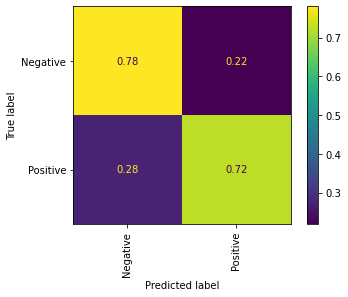

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, predicted, labels=best_svc_test.classes_, 
                                        xticks_rotation="vertical", normalize="true")

In [82]:
rf_predicted = best_rf_test.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, rf_predicted, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Random Forest:
Precision: 0.7527601204416192
Recall: 0.767055496641923
F score: 0.7555555555555555


In [81]:
accuracy_score(ytest, rf_predicted)

0.7636363636363637

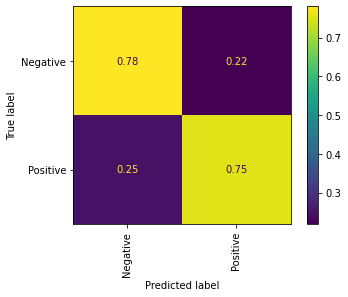

In [83]:
ConfusionMatrixDisplay.from_predictions(ytest, rf_predicted, labels=best_svc_test.classes_, 
                                        xticks_rotation="vertical", normalize="true")